In [ ]:
import io
import pandas as pd
from google.colab import files
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import RobustScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from datetime import datetime
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler

## 데이터셋 

로컬 작업을 위해 구글 드라이브를 이용

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/gdrive/MyDrive/데이터셋.xlsx')

## 데이터프레임


In [ ]:
df.head().T

,0,1,2,3,4
No,1,2,3,4,5
Trial,1,1,1,1,1
ModelID,Move_G00_Rapid,Move_G00_Rapid,Move_G00_Rapid,Move_G00_Rapid,Move_G00_Rapid
Feature,Move,Move,Move,Move,Move
Command,G00,G00,G00,G00,G00
Trajectory,Rapid,Rapid,Rapid,Rapid,Rapid
CuttingSpeed,76.2,76.2,76.2,76.2,76.2
SpindleSpeed,1500,1500,1500,1500,1500
CuttingDepth,1.5,1.5,1.5,1.5,1.5
Timestamp,2014-10-30T21:33:18.830Z,2014-10-30T21:33:19.127Z,2014-10-30T21:33:19.454Z,2014-10-30T21:33:19.735Z,2014-10-30T21:33:20.016Z


## Regression을 위한 데이터프레임 : df1

X : 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth' </br>
y : 'Power'

In [ ]:
df1 = df[df['ModelID'] == 'Slot2_G01_Feed'][['No', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']]
df4 = df[df['ModelID'] == 'Slot7_G03_CFeed'][['No', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']]

#x = df1.values
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df1 = pd.DataFrame(x_scaled)
#df1.columns = ['No', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power']
df1 = df1.dropna()
df1

,No,CuttingSpeed,SpindleSpeed,CuttingDepth,Power,Path_feedrate
5904,5905,76.20,1500,1.5,2572.480,74
5905,5906,76.20,1500,1.5,2587.264,74
5906,5907,76.20,1500,1.5,2578.240,74
5907,5908,76.20,1500,1.5,2609.344,74
5908,5909,76.20,1500,1.5,2604.608,74
...,...,...,...,...,...,...
189586,112514,142.24,2000,1.0,2538.688,142
189587,112515,142.24,2000,1.0,2541.760,142
189588,112516,142.24,2000,1.0,2536.576,142
189589,112517,142.24,2000,1.0,2545.536,142


## Regression Model

train_size = 0.8 </br>
test_size = 0.2 </br>
X = 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Path_feedrate' </br>
y = 'Power' </br>
모델 평가는 R2

In [ ]:
X = df1[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Path_feedrate']]
y = df1["Power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = linear_model.LinearRegression()
reg = make_pipeline(MinMaxScaler(), model)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
def error_rate(test, pred):
  mae = mean_absolute_error(test, pred)
  return (mae/test.mean())*100

In [ ]:
print(r2_score(y_test, y_pred)) 
print(error_rate(y_test, y_pred))

0.5244933623263379
1.3873531481000163


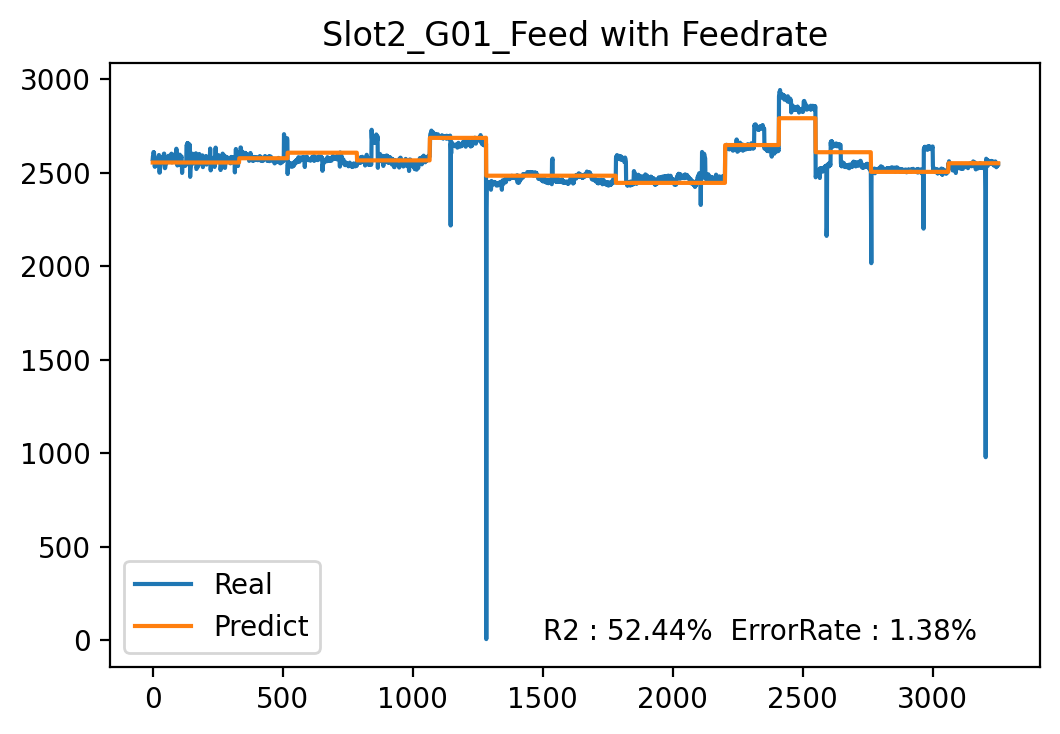

In [ ]:
plt.figure(dpi=200)
plt.title('Slot2_G01_Feed with Feedrate')
plt.text(x=1500, y=0.1, s='R2 : 52.44%  ErrorRate : 1.38%')
plt.plot(range(len(X)), y)
plt.plot(range(len(X)), reg.predict(X))
plt.legend(['Real', 'Predict'])
plt.show()

0.5244915374796035
1.3872480614328553


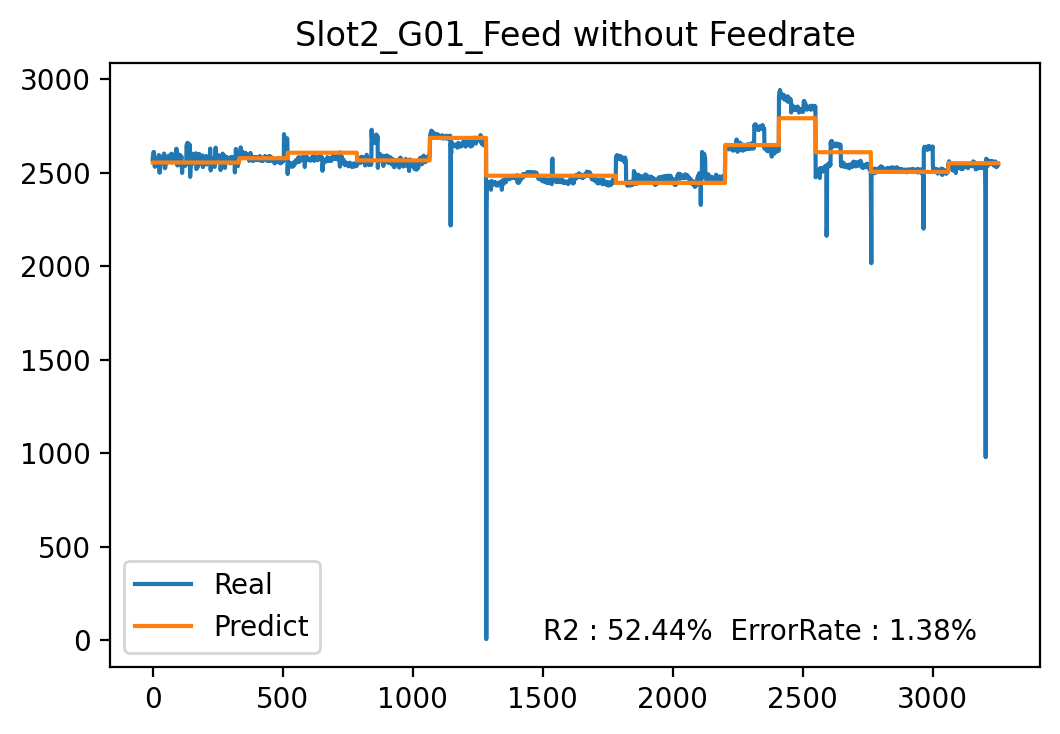

In [ ]:
df11 = df[df['ModelID'] == 'Slot2_G01_Feed'][['No', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power']]

df11 = df11.dropna()

X = df11[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth']]
y = df11["Power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = linear_model.LinearRegression()
reg = make_pipeline(MinMaxScaler(), model)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = r2_score(y_test, y_pred)
print(score)
print(error_rate(y_test,y_pred))
y_pred_plot = reg.predict(X)
plt.figure(dpi=200)
plt.title('Slot2_G01_Feed without Feedrate')
plt.text(x=1500, y=0.1, s='R2 : 52.44%  ErrorRate : 1.38%')
plt.plot(range(len(X)), df11['Power'])
plt.plot(range(len(X)), y_pred_plot)
plt.legend(['Real', 'Predict'])
plt.show()

## 시계열 분석을 위한 데이터 변환
str to datetime

In [ ]:
temp_list = []
for i in range(len(df)):
  temp = df['Timestamp'].iloc[i].replace("T", " ")
  temp = temp.replace("Z", "")
  temp_list.append(temp)

temp_list_2 = []
for string in temp_list:
  temp_string = datetime.strptime(string, '%Y-%m-%d %H:%M:%S.%f')
  temp_list_2.append(temp_string)

df['date'] = temp_list_2

df['date']

0        2014-10-30 21:33:18.830
1        2014-10-30 21:33:19.127
2        2014-10-30 21:33:19.454
3        2014-10-30 21:33:19.735
4        2014-10-30 21:33:20.016
                   ...          
200496   2015-01-30 01:26:48.499
200497   2015-01-30 01:26:48.799
200498   2015-01-30 01:26:49.111
200499   2015-01-30 01:26:49.423
200500   2015-01-30 01:26:49.735
Name: date, Length: 200501, dtype: datetime64[ns]

In [ ]:
df.sort_values('date', inplace=True)

## Multivariate Time Series 분석을 위한 데이터프레임 : df3
X : 'date', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth' </br>
y : 'Power' 

In [ ]:
temp_df3 = df[
         df['ModelID'] == 'Slot2_G01_Feed'][
           ['date', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power']
        ]
temp_df3 = temp_df3.dropna()
temp_df3

,date,CuttingSpeed,SpindleSpeed,CuttingDepth,Power
5904,2014-10-30 22:03:08.820,76.20,1500,1.5,2572.480
5905,2014-10-30 22:03:09.132,76.20,1500,1.5,2587.264
5906,2014-10-30 22:03:09.428,76.20,1500,1.5,2578.240
5907,2014-10-30 22:03:09.725,76.20,1500,1.5,2609.344
5908,2014-10-30 22:03:10.021,76.20,1500,1.5,2604.608
...,...,...,...,...,...
189586,2015-01-30 00:29:14.876,142.24,2000,1.0,2538.688
189587,2015-01-30 00:29:15.196,142.24,2000,1.0,2541.760
189588,2015-01-30 00:29:15.524,142.24,2000,1.0,2536.576
189589,2015-01-30 00:29:15.844,142.24,2000,1.0,2545.536


## Keras
Slot7_G03_CFeed keras로 fitting 해보기

In [ ]:
df4 = df[df['ModelID'] == 'Slot7_G03_CFeed'][['No', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']]

#x = df4.values 
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#df4 = pd.DataFrame(x_scaled)
#df4.columns = ['No', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power']
df4 = df4.dropna()
df4

,No,CuttingSpeed,SpindleSpeed,CuttingDepth,Power,Path_feedrate
17556,17557,76.20,1500,1.5,2513.856,76
17557,17558,76.20,1500,1.5,1562.624,76
17558,17559,76.20,1500,1.5,2592.960,76
17559,17560,76.20,1500,1.5,2611.968,76
17560,17561,76.20,1500,1.5,2607.808,76
...,...,...,...,...,...,...
200140,123068,142.24,2000,1.0,2571.456,142
200141,123069,142.24,2000,1.0,2572.992,142
200142,123070,142.24,2000,1.0,2568.704,142
200143,123071,142.24,2000,1.0,2554.240,142


In [ ]:
X = df4[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Path_feedrate']]
y = df4["Power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = linear_model.LinearRegression()
reg = make_pipeline(MinMaxScaler(), model)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
score = r2_score(y_test, y_pred)
print(score)
print(error_rate(y_test,y_pred))

0.33703116575753367
1.9585957925944093


In [ ]:
y_pred_plot = reg.predict(X)

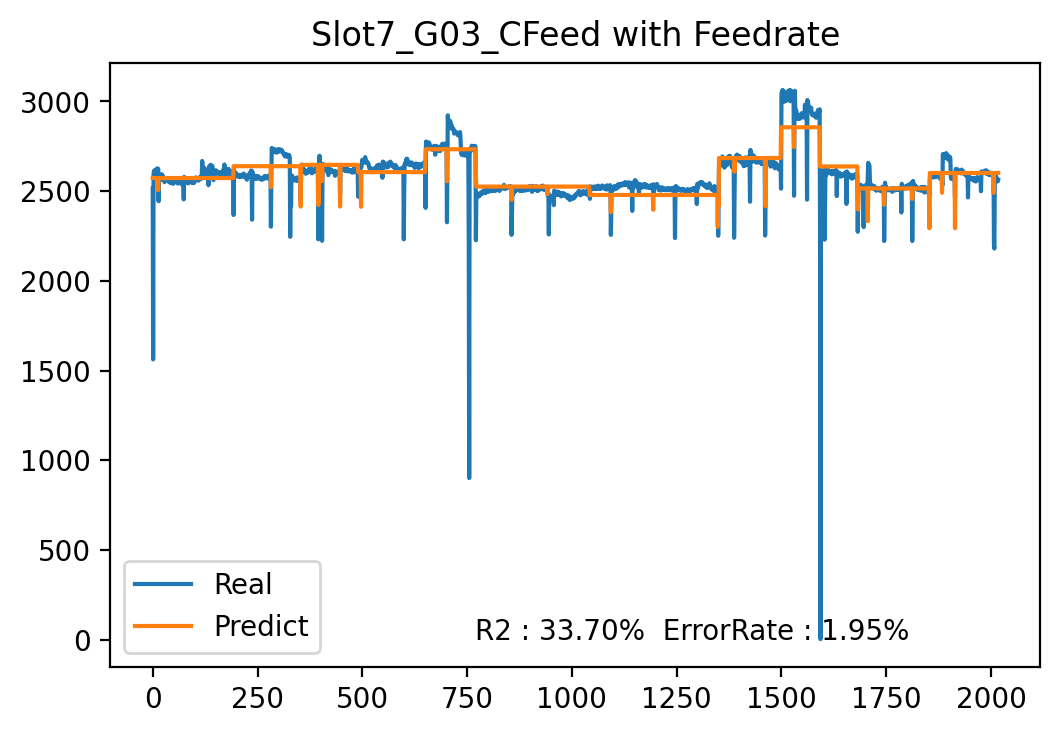

In [ ]:
plt.figure(dpi=200)
plt.title('Slot7_G03_CFeed with Feedrate')
plt.plot(range(len(X)), df4['Power'])
plt.plot(range(len(X)), y_pred_plot)
plt.text(x=770, y=0.1, s='R2 : 33.70%  ErrorRate : 1.95%')
plt.legend(['Real', 'Predict'])
plt.show()

0.33083736460800295
1.986872090291349


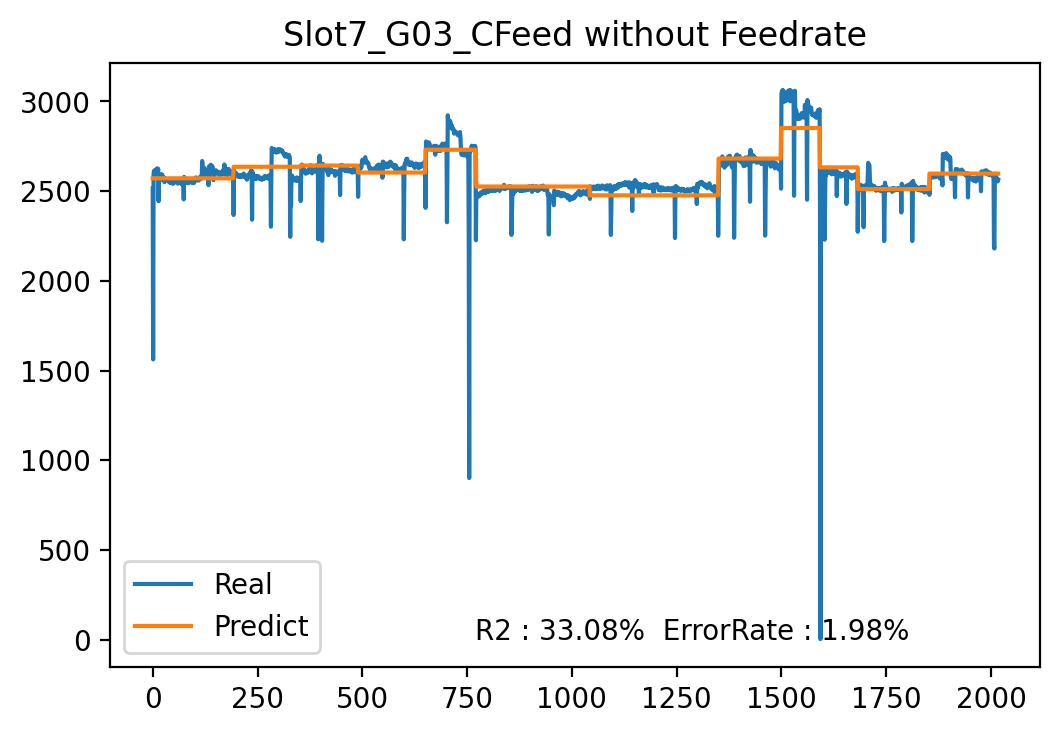

In [ ]:
df10 = df[df['ModelID'] == 'Slot7_G03_CFeed'][['No', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power']]

df10 = df10.dropna()

X = df10[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth']]
y = df10["Power"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
model = linear_model.LinearRegression()
reg = make_pipeline(MinMaxScaler(), model)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
score = r2_score(y_test, y_pred)
print(score)
print(error_rate(y_test,y_pred))
y_pred_plot = reg.predict(X)
plt.figure(dpi=200)
plt.title('Slot7_G03_CFeed without Feedrate')
plt.text(x=770, y=0.1, s='R2 : 33.08%  ErrorRate : 1.98%')
plt.plot(range(len(X)), df10['Power'])
plt.plot(range(len(X)), y_pred_plot)
plt.legend(['Real', 'Predict'])
plt.show()

## MLP 

train_size = 0.8 </br>
test_size = 0.2 </br>
X = 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Path_feedrate' </br>
y = 'Power' </br>
모델 평가는 R2 </br>
max_iter=1000000, hidden_layer_sizes=200, learning_rate_init=0.001

In [ ]:
df4 = df4[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']]

x = df4.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df4 = pd.DataFrame(x_scaled)
df4.columns = ['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']
df4 = df4.dropna()
df4

,CuttingSpeed,SpindleSpeed,CuttingDepth,Power,Path_feedrate
0,0.214286,0.0,0.5,0.820342,0.4750
1,0.214286,0.0,0.5,0.509485,0.4750
2,0.214286,0.0,0.5,0.846192,0.4750
3,0.214286,0.0,0.5,0.852404,0.4750
4,0.214286,0.0,0.5,0.851045,0.4750
...,...,...,...,...,...
2013,0.833333,1.0,0.0,0.839165,0.8875
2014,0.833333,1.0,0.0,0.839667,0.8875
2015,0.833333,1.0,0.0,0.838266,0.8875
2016,0.833333,1.0,0.0,0.833539,0.8875


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

X = df4[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Path_feedrate']]
y = df4['Power']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

reg = MLPRegressor(max_iter=1000000, hidden_layer_sizes=200, learning_rate_init=0.001).fit(X_train, y_train)
predict = reg.predict(X_test)
print(r2_score(y_test, predict))
print(error_rate(y_test, predict))

0.2682858990837629
0.2682858990837629
1.71579618191453


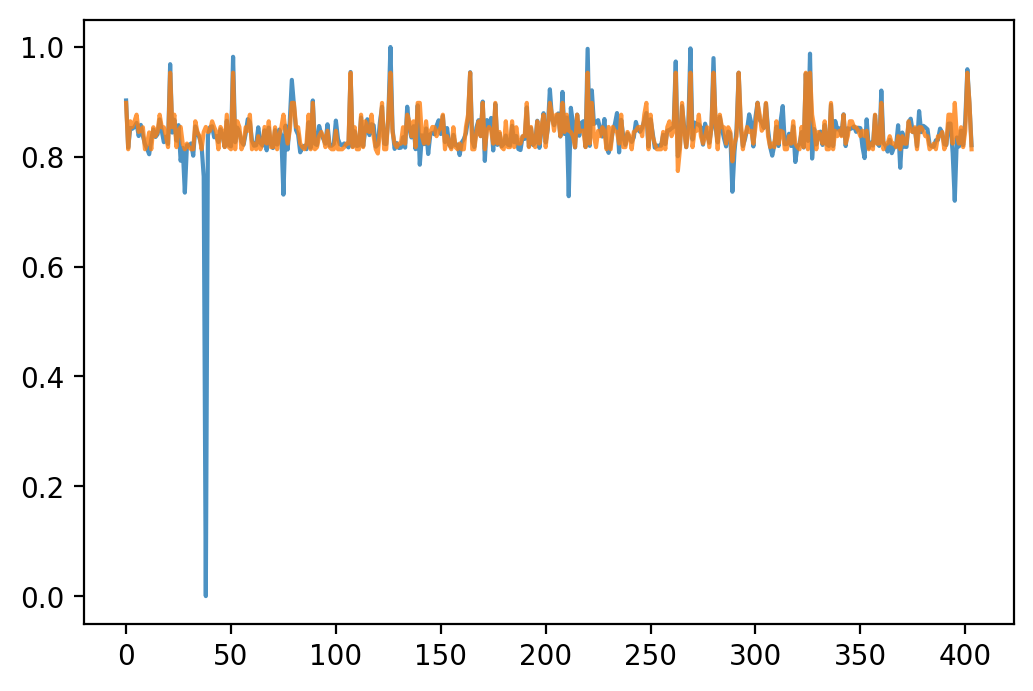

In [ ]:
plt.figure(dpi=200)
predict = reg.predict(X_test)
plt.plot(range(len(X_test)), y_test, alpha=0.8)
plt.plot(range(len(X_test)), predict, alpha=0.8)
plt.show()

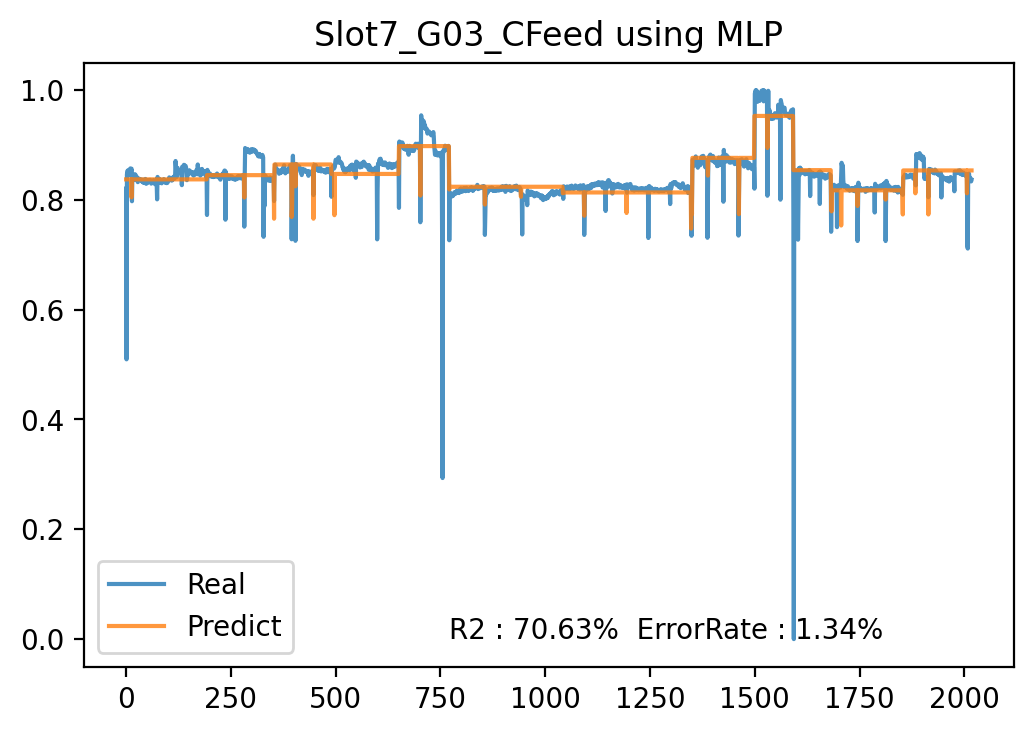

In [ ]:
plt.figure(dpi=200)
plt.plot(range(len(X)), y, alpha=0.8)
plt.plot(range(len(X)), reg.predict(X), alpha=0.8)
plt.legend(['Real', 'Predict'])
plt.text(x=770, y=0.001, s='R2 : 70.63%  ErrorRate : 1.34%')
plt.title('Slot7_G03_CFeed using MLP')

plt.show()

In [ ]:
#pd.get_dummies(df['Feature', 'Command', 'Trajectory'], prefix=['Feature', 'Command', 'Trajectory']).head(10)
#feature_one_hot_encoded = pd.get_dummies(df.Feature)
#print(feature_one_hot_encoded)

df5 = df[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Feature', 'Command', 'Trajectory', 'Path_feedrate']].dropna()
df5_temp = df5[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']]

x = df5_temp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
#robust_scaler = RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
df5_temp = pd.DataFrame(x_scaled)
df5_temp.columns = ['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']

df5_temp = df5_temp.reset_index()
df5 = df5.reset_index()

df5_X = pd.concat((df5_temp[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Path_feedrate']], pd.get_dummies(df5.Feature), pd.get_dummies(df5.Command), pd.get_dummies(df5.Trajectory)), axis=1)
df5_y = df5_temp['Power']
df5_X

,CuttingSpeed,SpindleSpeed,CuttingDepth,Path_feedrate,Hole1,Hole2,Move,Pocket1,Pocket2,Pocket3,Profile1,Slot1,Slot2,Slot3,Slot4,Slot5,Slot6,Slot7,G00,G01,G02,G03,App,Back,CFeed,Feed,Rapid,Ret,Skip,Step,XFeed,YFeed
0,0.214286,0.0,0.5,0.692971,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.214286,0.0,0.5,0.746288,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.214286,0.0,0.5,0.746288,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.214286,0.0,0.5,0.554283,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.214286,0.0,0.5,0.707114,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172799,0.833333,1.0,0.0,0.707114,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
172800,0.833333,1.0,0.0,0.707114,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
172801,0.833333,1.0,0.0,1.000000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
172802,0.833333,1.0,0.0,0.707114,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


0.5000243828291333
0.5000243828291333
2.434756047658717


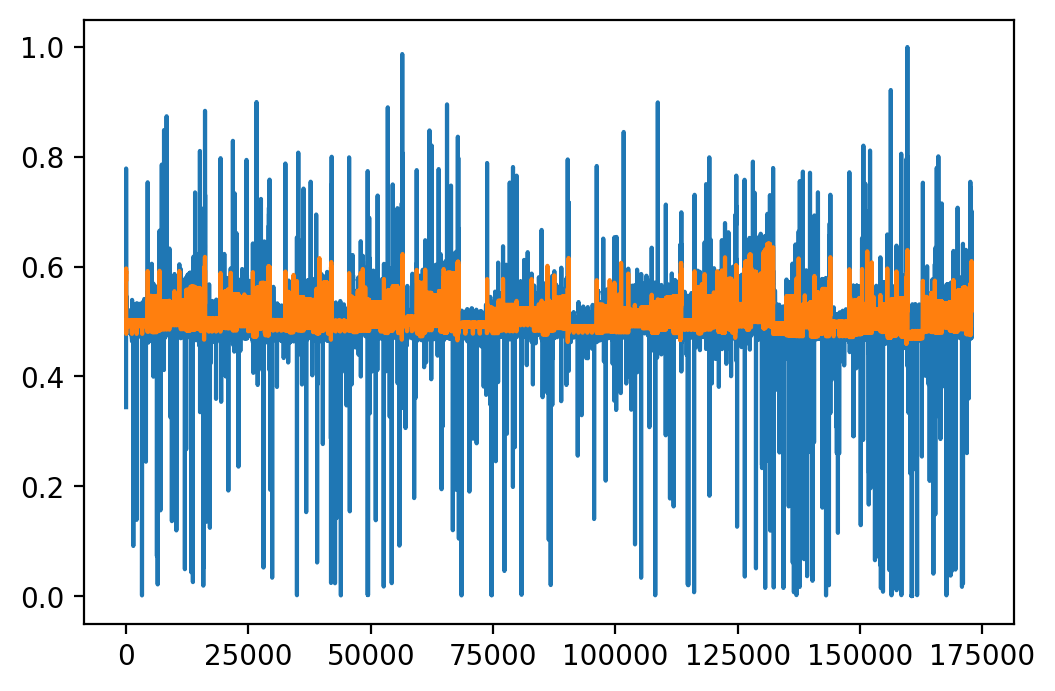

In [ ]:
X = df5_X
y = df5_y

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

reg = MLPRegressor(max_iter=1000, hidden_layer_sizes=(200), learning_rate_init=0.001).fit(X_train, y_train)
predict = reg.predict(X_test)

print(reg.score(X_test,y_test))
print(r2_score(y_test, predict))
print(error_rate(y_test,predict))

plt.figure(dpi=200)
plt.plot(range(len(X)), y)
plt.plot(range(len(X)), reg.predict(X))

plt.show()

In [ ]:
#pd.get_dummies(df['Feature', 'Command', 'Trajectory'], prefix=['Feature', 'Command', 'Trajectory']).head(10)
#feature_one_hot_encoded = pd.get_dummies(df.Feature)
#print(feature_one_hot_encoded)

df6 = df[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Command', 'Trajectory', 'Path_feedrate']].dropna()
df6_temp = df6[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']]

x = df6_temp.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
#robust_scaler = RobustScaler()
x_scaled = min_max_scaler.fit_transform(x)
df6_temp = pd.DataFrame(x_scaled)
df6_temp.columns = ['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']

df6_temp = df6_temp.reset_index()
df6 = df6.reset_index()

df6_X = pd.concat((df6_temp[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Path_feedrate']], pd.get_dummies(df6.Command), pd.get_dummies(df6.Trajectory)), axis=1)
df6_y = df6_temp['Power']
df6_X

,CuttingSpeed,SpindleSpeed,CuttingDepth,Path_feedrate,G00,G01,G02,G03,App,Back,CFeed,Feed,Rapid,Ret,Skip,Step,XFeed,YFeed
0,0.214286,0.0,0.5,0.692971,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0.214286,0.0,0.5,0.746288,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0.214286,0.0,0.5,0.746288,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0.214286,0.0,0.5,0.554283,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0.214286,0.0,0.5,0.707114,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172799,0.833333,1.0,0.0,0.707114,1,0,0,0,0,0,0,0,1,0,0,0,0,0
172800,0.833333,1.0,0.0,0.707114,1,0,0,0,0,0,0,0,1,0,0,0,0,0
172801,0.833333,1.0,0.0,1.000000,1,0,0,0,0,0,0,0,1,0,0,0,0,0
172802,0.833333,1.0,0.0,0.707114,1,0,0,0,0,0,0,0,1,0,0,0,0,0


0.31315912089560993
0.31315912089560993
3.627199299320101


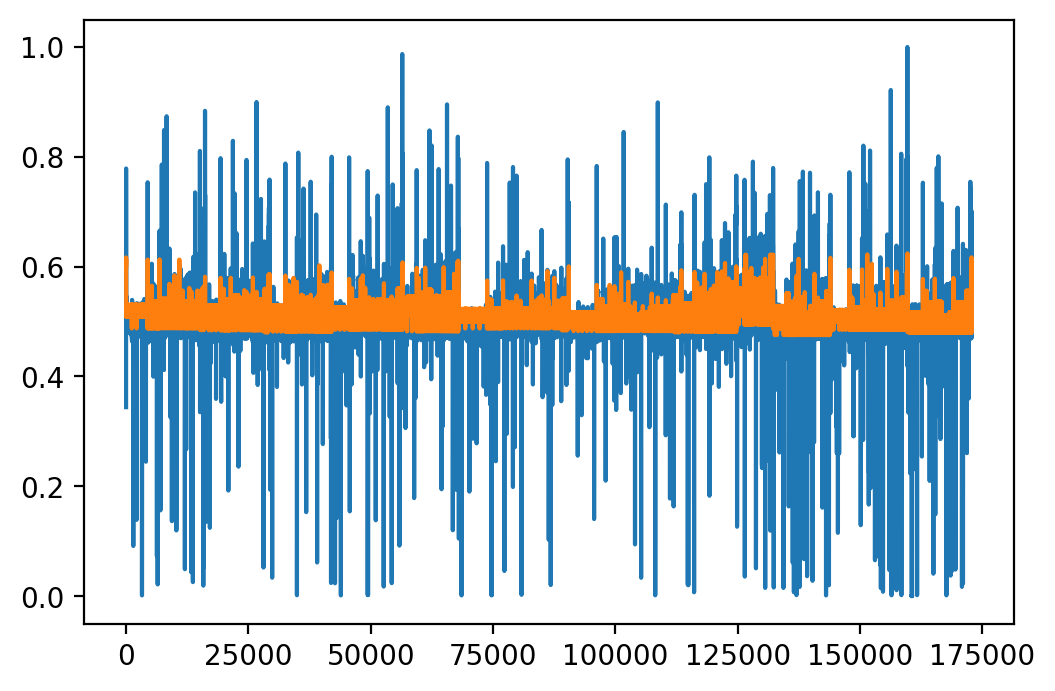

In [ ]:
X = df6_X
y = df6_y

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

reg = MLPRegressor(max_iter=1000, hidden_layer_sizes=(32,32), learning_rate_init=0.001).fit(X_train, y_train)
predict = reg.predict(X_test)

print(reg.score(X_test,y_test))
print(r2_score(y_test, predict))
print(error_rate(y_test, predict))

plt.figure(dpi=200)
plt.plot(range(len(X)), y)
plt.plot(range(len(X)), reg.predict(X))

plt.show()

## SVR 
df7

In [ ]:
df7 = df[df['Feature'] == 'Slot7'][df['Command']=='G03'][df['Trajectory']=='CFeed'][['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']].dropna()
df7

,CuttingSpeed,SpindleSpeed,CuttingDepth,Power,Path_feedrate
17556,76.20,1500,1.5,2513.856,76
17557,76.20,1500,1.5,1562.624,76
17558,76.20,1500,1.5,2592.960,76
17559,76.20,1500,1.5,2611.968,76
17560,76.20,1500,1.5,2607.808,76
...,...,...,...,...,...
200140,142.24,2000,1.0,2571.456,142
200141,142.24,2000,1.0,2572.992,142
200142,142.24,2000,1.0,2568.704,142
200143,142.24,2000,1.0,2554.240,142


In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
X = df7[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Path_feedrate']]
y = df7['Power']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
svr_lin = SVR(kernel='linear',  gamma='auto', epsilon=0.01, C=100.0, tol=0.1)
reg = make_pipeline(MinMaxScaler(), svr_lin)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

#param = {'kernel' : ['linear'],'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

#modelsvr = SVR()

#grids = GridSearchCV(modelsvr,param,cv=5)

#grids.fit(X_train,y_train)

In [ ]:
y_pred = reg.predict(X_test)
#print(r2_score(y_test, y_pred))

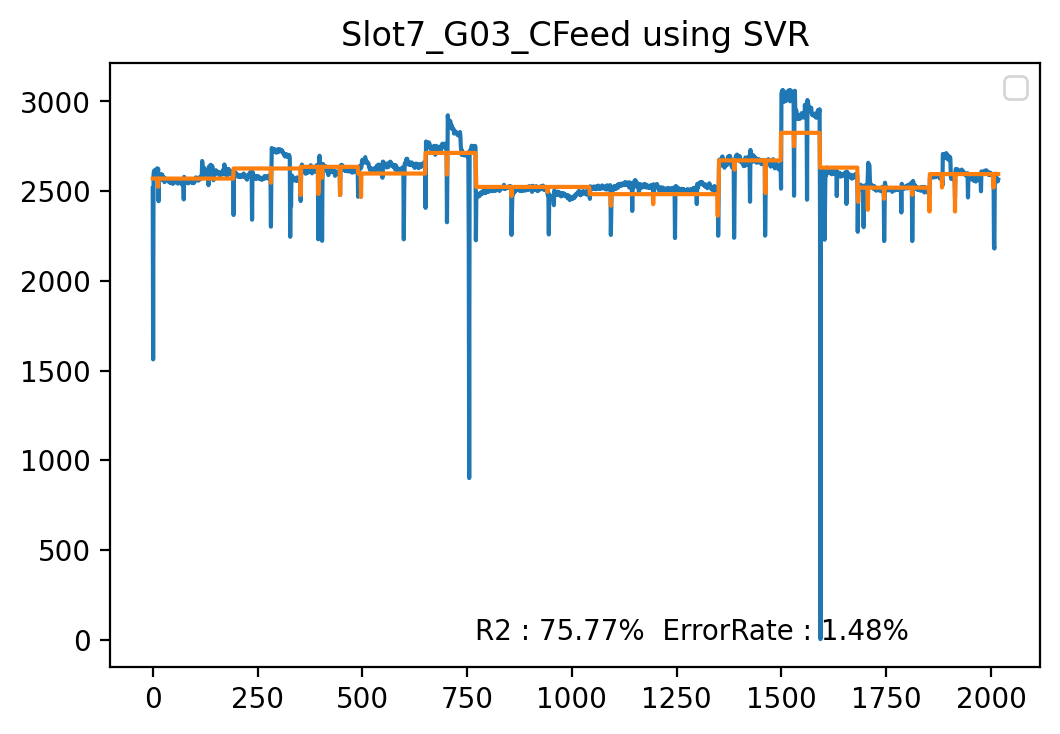

In [ ]:
plt.figure(dpi=200)
plt.legend(['Real', 'Predict'])
plt.text(x=770, y=0.001, s='R2 : 75.77%  ErrorRate : 1.48%')
plt.title('Slot7_G03_CFeed using SVR')
plt.plot(range(len(X)), y)
plt.plot(range(len(X)), reg.predict(X))

In [ ]:
df8 = df[df['Feature'] == 'Slot7'][df['Command']=='G03'][['Trajectory', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']].dropna()
df8

,Trajectory,CuttingSpeed,SpindleSpeed,CuttingDepth,Power,Path_feedrate
17556,CFeed,76.20,1500,1.5,2513.856,76
17557,CFeed,76.20,1500,1.5,1562.624,76
17558,CFeed,76.20,1500,1.5,2592.960,76
17559,CFeed,76.20,1500,1.5,2611.968,76
17560,CFeed,76.20,1500,1.5,2607.808,76
...,...,...,...,...,...,...
200232,Back,142.24,2000,1.0,2230.592,142
200233,Back,142.24,2000,1.0,2238.976,142
200234,Back,142.24,2000,1.0,2235.776,142
200235,Back,142.24,2000,1.0,2243.776,142


In [ ]:
df8_X = pd.concat((df8[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Path_feedrate']], pd.get_dummies(df8.Trajectory)), axis=1)
df8_y = df8['Power']

In [ ]:
df8_X

,CuttingSpeed,SpindleSpeed,CuttingDepth,Path_feedrate,Back,CFeed,Skip
17556,76.20,1500,1.5,76,0,1,0
17557,76.20,1500,1.5,76,0,1,0
17558,76.20,1500,1.5,76,0,1,0
17559,76.20,1500,1.5,76,0,1,0
17560,76.20,1500,1.5,76,0,1,0
...,...,...,...,...,...,...,...
200232,142.24,2000,1.0,142,1,0,0
200233,142.24,2000,1.0,142,1,0,0
200234,142.24,2000,1.0,142,1,0,0
200235,142.24,2000,1.0,142,1,0,0


In [ ]:
X = df8_X
y = df8_y
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
#svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_lin = SVR(kernel='linear',  gamma='auto', epsilon=0.01, C=100.0, tol=0.1)
reg = make_pipeline(MinMaxScaler(), svr_lin)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print(reg.score(X_test,y_test))
print(error_rate(y_test, y_pred))

0.7578380906593641
2.3675174075408574


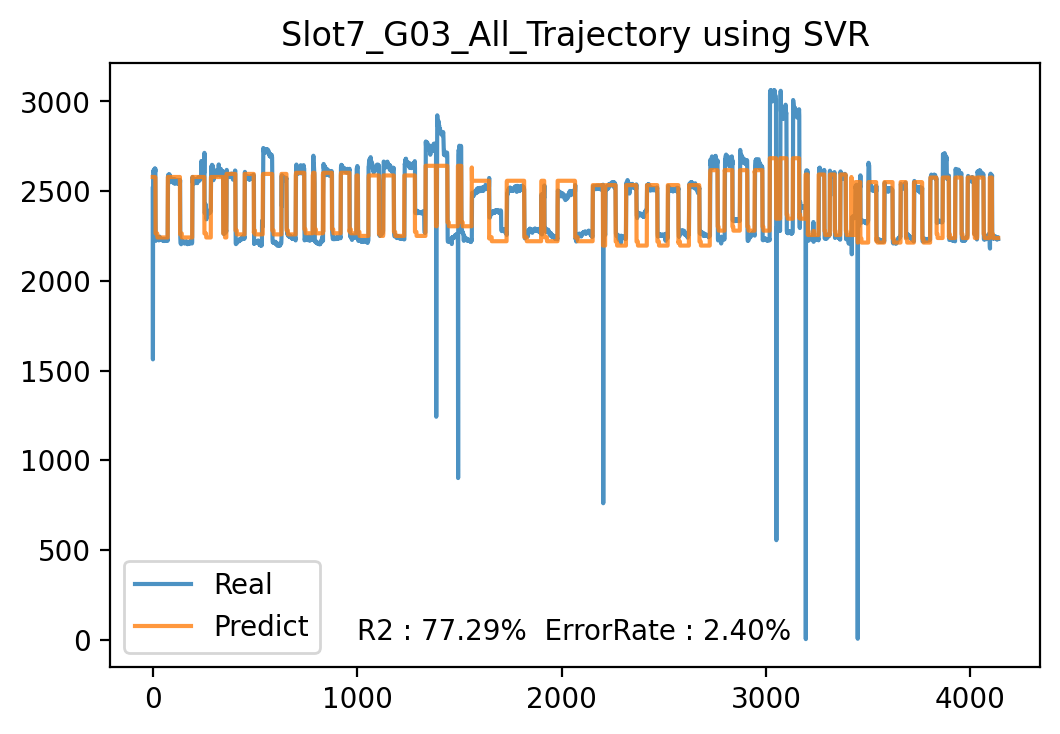

In [ ]:
plt.figure(dpi=200)
plt.text(x=1000, y=1, s='R2 : 77.29%  ErrorRate : 2.40%')
plt.title('Slot7_G03_All_Trajectory using SVR')
plt.plot(range(len(X)), y, alpha=0.8)
plt.plot(range(len(X)), reg.predict(X), alpha=0.8)
plt.legend(['Real', 'Predict'])

plt.show()



In [ ]:
df9 = df[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Feature', 'Command', 'Trajectory']].dropna()
df9_X = pd.concat((df9[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth']], pd.get_dummies(df9.Feature), pd.get_dummies(df9.Command), pd.get_dummies(df9.Trajectory)), axis=1)
df9_y = df5_temp['Power']
df9_X

,CuttingSpeed,SpindleSpeed,CuttingDepth,Hole1,Hole2,Move,Pocket1,Pocket2,Pocket3,Profile1,Slot1,Slot2,Slot3,Slot4,Slot5,Slot6,Slot7,G00,G01,G02,G03,App,Back,CFeed,Feed,Rapid,Ret,Skip,Step,XFeed,YFeed
0,76.20,1500,1.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
1,76.20,1500,1.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,76.20,1500,1.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,76.20,1500,1.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,76.20,1500,1.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200496,142.24,2000,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
200497,142.24,2000,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
200498,142.24,2000,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
200499,142.24,2000,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0


In [ ]:
#X = df9_X
#y = df9_y
#X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
#svr_lin = SVR(kernel='linear', C=100, gamma='auto')
#svr_lin = SVR(kernel='linear',  gamma='auto', epsilon=0.01, C=100.0, tol=0.1)
#reg = make_pipeline(MinMaxScaler(), svr_lin)
#reg.fit(X_train, y_train)
#print(reg.score(X_test,y_test))
#print(error_rate(y_test, reg.predict(X)))

In [ ]:
#print(error_rate(y_test, reg.predict(X)))

In [ ]:
#plt.figure(dpi=200)
#plt.plot(range(len(X)), y)
#plt.plot(range(len(X)), reg.predict(X))
#plt.legend(['Real', 'Predict'])
#plt.show()

In [ ]:
df[df['Command'] != 'G00']['Feature'].unique()

df[df['Command'] != 'G00']['Command'].unique()
import warnings

warnings.filterwarnings(action='ignore')

list_r2 = []
list_rate = []

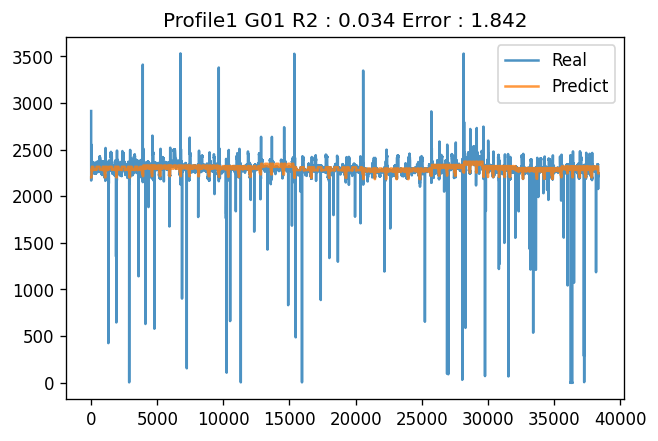

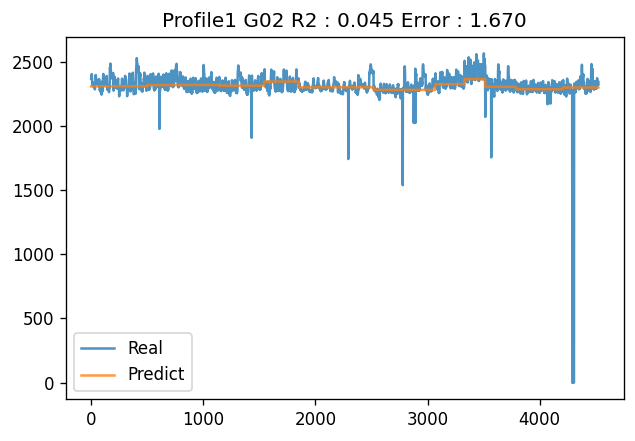

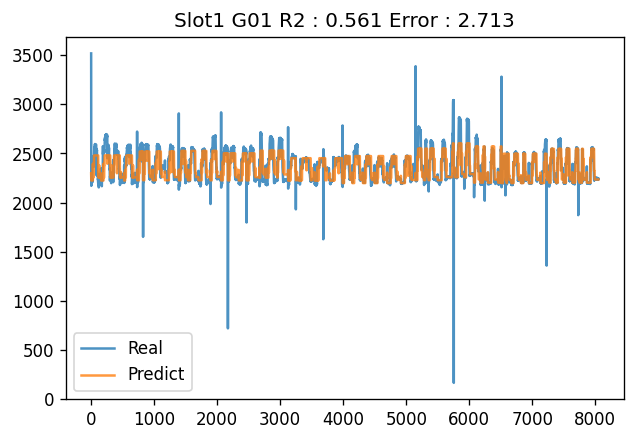

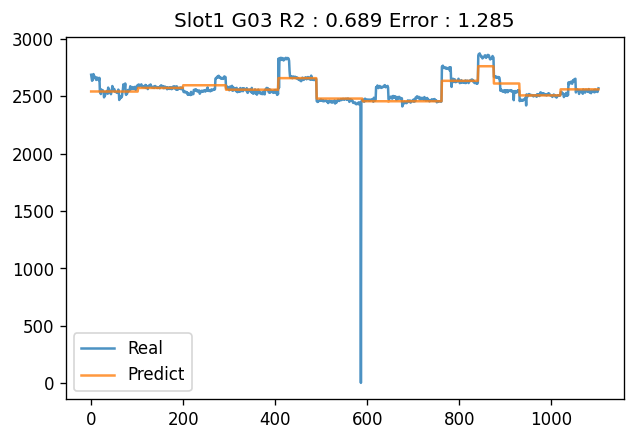

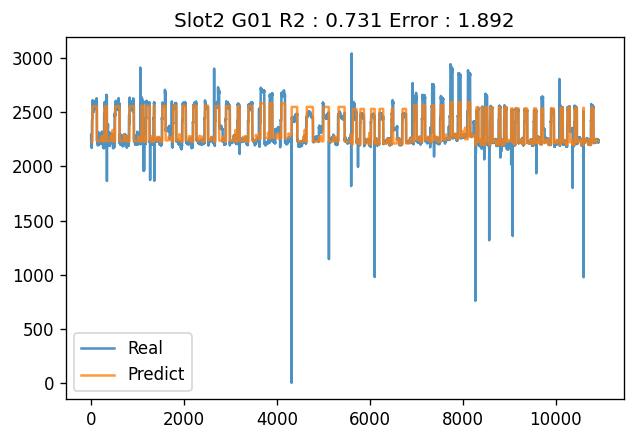

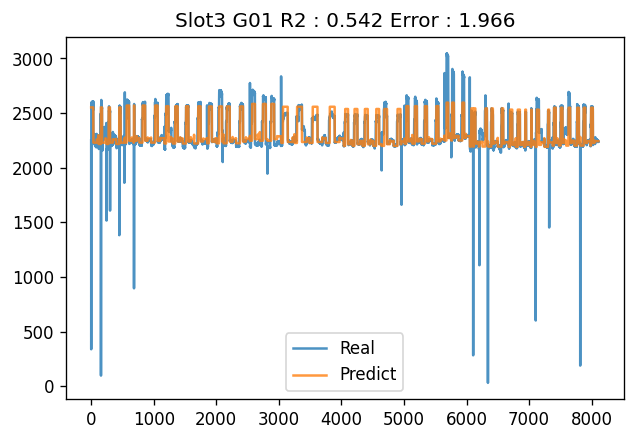

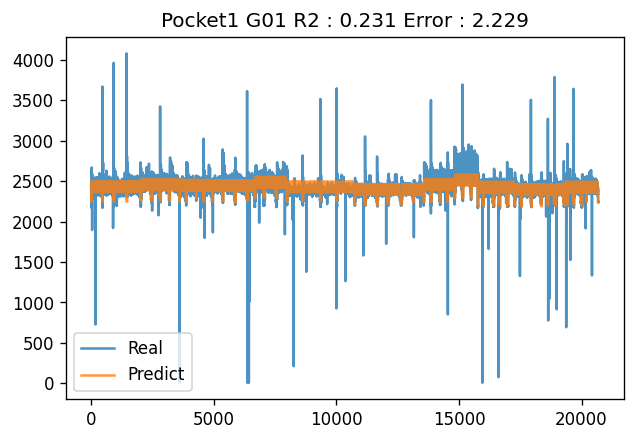

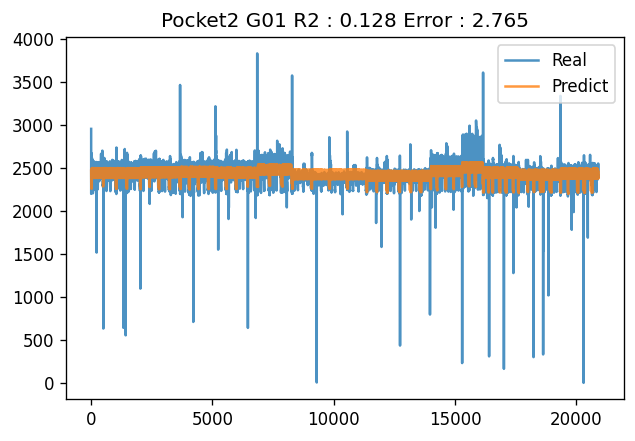

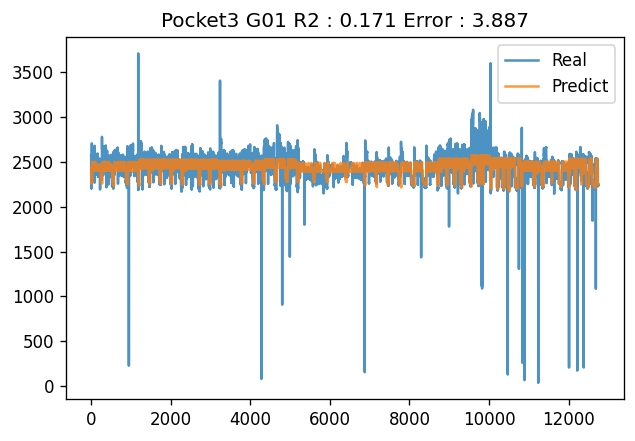

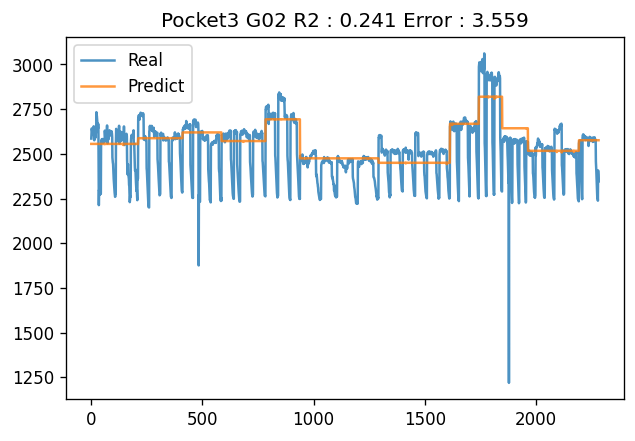

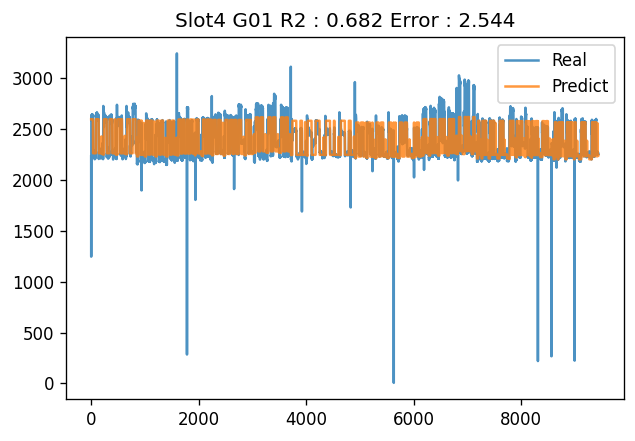

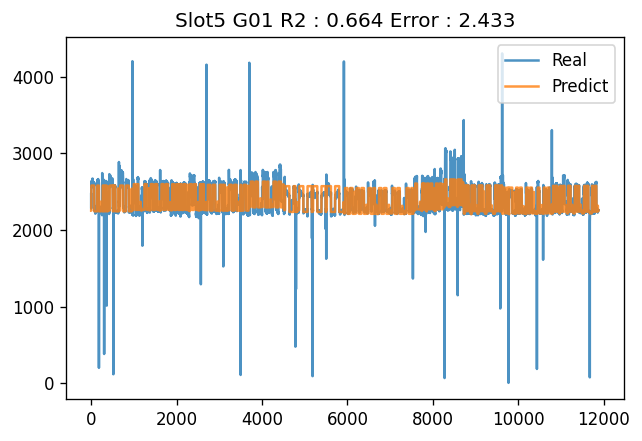

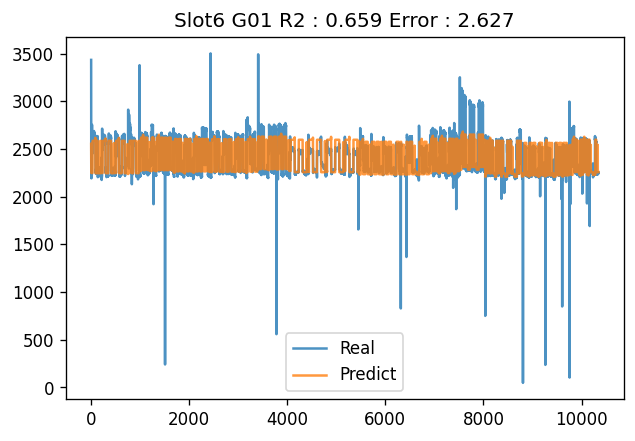

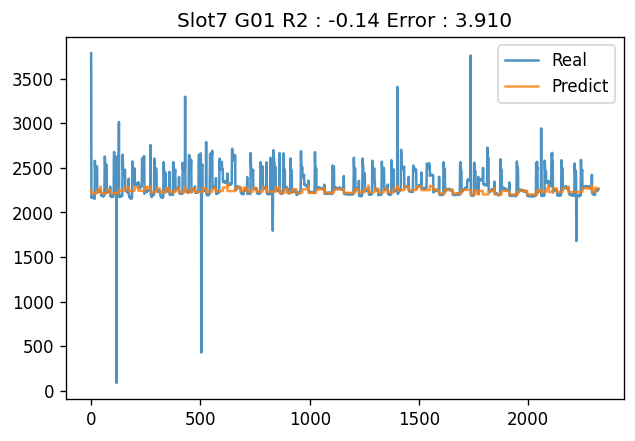

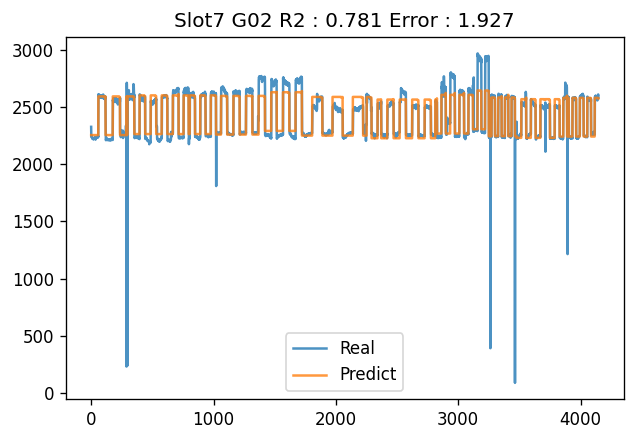

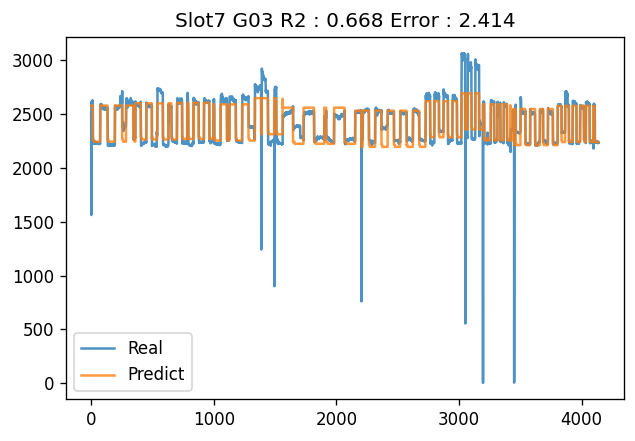

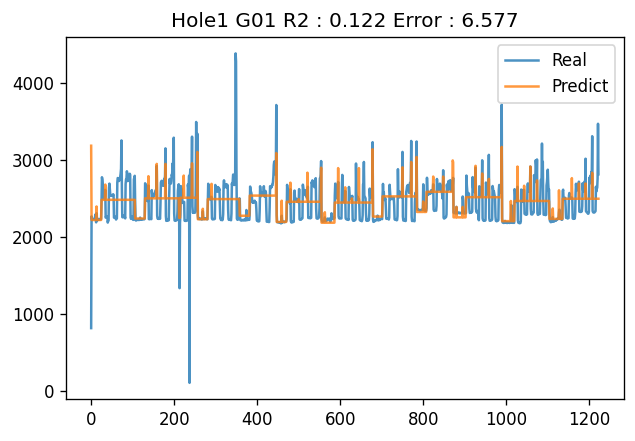

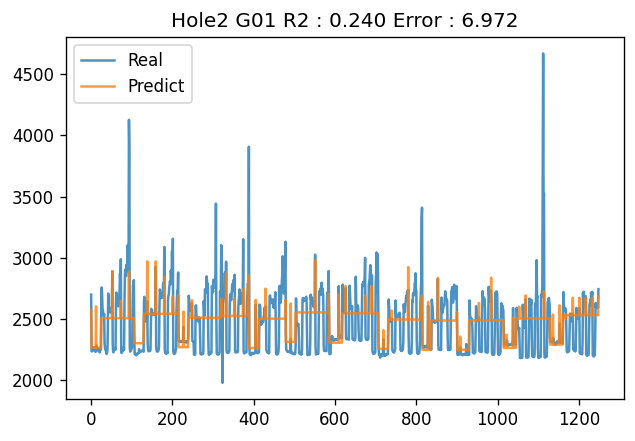

In [ ]:
for feature in df[df['Command'] != 'G00']['Feature'].unique():
  for command in df[df['Command'] != 'G00']['Command'].unique():
    df12 = df[df['Feature'] == feature][df['Command'] == command][['Trajectory', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']].dropna()
    if len(df12) > 1 :
      df12_X = pd.concat((df12[['CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Path_feedrate']], pd.get_dummies(df12.Trajectory)), axis=1)
      df12_y = df12['Power']
      X = df12_X
      y = df12_y
      X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
      svr_lin = SVR(kernel='linear',  gamma='auto', epsilon=0.01, C=100.0, tol=0.1)
      reg = make_pipeline(MinMaxScaler(), svr_lin)
      reg.fit(X_train, y_train)
      y_pred = reg.predict(X_test)
      r2 = reg.score(X_test,y_test)
      rate = error_rate(y_test, y_pred)
      list_r2.append(r2)
      list_rate.append(rate)
      plt.figure(dpi=120)
      #plt.text(x=0.001, y=0.001, s="R2 : " + str(r2)[:5] + " Error : " + str(rate)[:5])
      plt.title(feature + " " + command + " R2 : " + str(r2)[:5] + " Error : " + str(rate)[:5])
      plt.plot(range(len(X)), y, alpha=0.8)
      plt.plot(range(len(X)), reg.predict(X), alpha=0.8)
      plt.legend(['Real', 'Predict'])
      plt.show()

In [ ]:
list_model = []
for feature in df[df['Command'] != 'G00']['Feature'].unique():
  for command in df[df['Command'] != 'G00']['Command'].unique():
    df12 = df[df['Feature'] == feature][df['Command'] == command][['Trajectory', 'CuttingSpeed', 'SpindleSpeed', 'CuttingDepth', 'Power', 'Path_feedrate']].dropna()
    if len(df12) > 1 :
      list_model.append(feature +" "+ command)

df_list['Model'] = pd.DataFrame(list_model)
df_list['R2'] = pd.DataFrame(list_r2)
df_list['Error_Rate'] = pd.DataFrame(list_rate)
df_list = df_list[['Model', 'R2', 'Error_Rate']]
df_list.loc[18] = ['average', df_list['R2'].mean(), df_list['Error_Rate'].mean()]
df_list

,Model,R2,Error_Rate
0,Profile1 G01,0.034467,1.842863
1,Profile1 G02,0.045601,1.670459
2,Slot1 G01,0.561928,2.713177
3,Slot1 G03,0.689195,1.285025
4,Slot2 G01,0.731103,1.892092
5,Slot3 G01,0.542433,1.966861
6,Pocket1 G01,0.231534,2.229647
7,Pocket2 G01,0.128585,2.765729
8,Pocket3 G01,0.171919,3.887680
9,Pocket3 G02,0.241330,3.559182
